<a href="https://colab.research.google.com/github/shaunak09vb/Toxic-Comment-Classifier-using-Deep-Learning/blob/main/NLP_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
!pip install talos

import numpy as np, pandas as pd



import re
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
from string import ascii_lowercase

from tqdm import tqdm_notebook
import itertools
import io

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from keras import initializers, regularizers, constraints, optimizers, layers
import talos
EPS = np.finfo(float).eps

In [5]:
pip install --upgrade statsmodels 

  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import statsmodels
print(statsmodels.__version__)

C:\Users\deepi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\deepi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


0.14.2


In [2]:
import numpy as np, pandas as pd
import re
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
from string import ascii_lowercase

from tqdm import tqdm_notebook
import itertools
import io

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from keras import initializers, regularizers, constraints, optimizers, layers

import talos # Import talos after installation

EPS = np.finfo(float).eps

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data

In [3]:
train=pd.read_csv('train.csv')    

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test=pd.read_csv('test.csv')

In [6]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# Data Exploration

Checking for missing values

In [7]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [8]:
test.isnull().any()


id              False
comment_text    False
dtype: bool

In [9]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train[labels].values

#Data Pre-processing

## Text Normalization

* Removing Characters in between Text
* Removing Repeated Characters
* Converting data to lower-case
* Removing Numbers from the data
* Remove Punctuation
* Remove Whitespaces
* Removing spaces in between words
* Removing "\n"
* Remove Non-english characters

In [10]:
RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 'f**k','fu*k',
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$',
            '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s','a55', '@$$'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole', 'a**hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h', 'b!tch', 'bi+ch', 'l3itch'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k', 'dik'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t', '$h1t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu', 'st*u'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses', 'p*ssy'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
    ' fucking ':
        [
            'f*$%-ing'
        ],
}


In [11]:
def clean_text(text,remove_repeat_text=True, remove_patterns_text=True, is_lower=True):

  if is_lower:
    text=text.lower()
    
  if remove_patterns_text:
    for target, patterns in RE_PATTERNS.items():
      for pat in patterns:
        text=str(text).replace(pat, target)

  if remove_repeat_text:
    text = re.sub(r'(.)\1{2,}', r'\1', text) 

  text = str(text).replace("\n", " ")
  text = re.sub(r'[^\w\s]',' ',text)
  text = re.sub('[0-9]',"",text)
  text = re.sub(" +", " ", text)
  text = re.sub("([^\x00-\x7F])+"," ",text)
  return text 

Cleaning Training Data

In [12]:
train['comment_text']=train['comment_text'].apply(lambda x: clean_text(x))
train['comment_text'][1]

'd aww he matches this background colour i m seemingly stuck with thanks talk january utc '

Cleaning Test Data

In [13]:
test['comment_text']=test['comment_text'].apply(lambda x: clean_text(x))
test['comment_text'][1048]

'this is a university ip address just fyi '

## Lemmatization

In [14]:
comments_train=train['comment_text']
comments_test=test['comment_text']

In [15]:
comments_train=list(comments_train)
comments_test=list(comments_test)

In [16]:
wordnet_lemmatizer = WordNetLemmatizer()

In [17]:
def lemma(text, lemmatization=True):
  output=""
  if lemmatization:
    text=text.split(" ")
    for word in text:
       word1 = wordnet_lemmatizer.lemmatize(word, pos = "n")
       word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
       word3 = wordnet_lemmatizer.lemmatize(word2, pos = "a")
       word4 = wordnet_lemmatizer.lemmatize(word3, pos = "r")
       output=output + " " + word4
  else:
    output=text
  
  return str(output.strip()) 

Lemmatizing Training Data

In [18]:
lemmatized_train_data = [] 

for line in tqdm_notebook(comments_train, total=159571): 
    lemmatized_train_data.append(lemma(line))

  0%|          | 0/159571 [00:00<?, ?it/s]

In [19]:
lemmatized_train_data[152458]

'i agree with you about graemel s intention he be a revert nazi and wikipedia ha a way of protect against this report him to the wp rr three revert rule notice board post by report the revert nazi graemel ha show himself herself to be a revert nazi this be unacceptable on a site that be make by it s user and not it s admins if you feel you have be unjustly revert more than time over a hour period please report him her to the three revert noticeboard wp rr it be time to take back what be ours'

Lemmatizing Test Data

In [20]:
lemmatized_test_data = [] 

for line in tqdm_notebook(comments_test, total=len(comments_test)): 
    lemmatized_test_data.append(lemma(line))

  0%|          | 0/153164 [00:00<?, ?it/s]

## Stopwords Removal

In [21]:
stopword_list=STOP_WORDS

Adding Single and Dual to STOP_WORDS

In [22]:
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_lowercase, repeat=size):
            yield "".join(s)

dual_alpha_list=[]
for s in iter_all_strings():
    dual_alpha_list.append(s)
    if s == 'zz':
        break

In [23]:
dual_alpha_list.remove('i')
dual_alpha_list.remove('a')
dual_alpha_list.remove('am')
dual_alpha_list.remove('an')
dual_alpha_list.remove('as')
dual_alpha_list.remove('at')
dual_alpha_list.remove('be')
dual_alpha_list.remove('by')
dual_alpha_list.remove('do')
dual_alpha_list.remove('go')
dual_alpha_list.remove('he')
dual_alpha_list.remove('hi')
dual_alpha_list.remove('if')
dual_alpha_list.remove('is')
dual_alpha_list.remove('in')
dual_alpha_list.remove('me')
dual_alpha_list.remove('my')
dual_alpha_list.remove('no')
dual_alpha_list.remove('of')
dual_alpha_list.remove('on')
dual_alpha_list.remove('or')
dual_alpha_list.remove('ok')
dual_alpha_list.remove('so')
dual_alpha_list.remove('to')
dual_alpha_list.remove('up')
dual_alpha_list.remove('us')
dual_alpha_list.remove('we')

In [24]:
for letter in dual_alpha_list:
    stopword_list.add(letter)
print("Done!!")

Done!!


Checking for other words that we may need in STOP_WORDS

In [25]:
def search_stopwords(data, search_stop=True):
  output=""
  if search_stop:
    data=data.split(" ")
    for word in data:
      if not word in stopword_list:
        output=output+" "+word 
  else:
    output=data

  return str(output.strip())  

In [26]:
potential_stopwords = [] 

for line in tqdm_notebook(lemmatized_train_data, total=159571): 
    potential_stopwords.append(search_stopwords(line))

  0%|          | 0/159571 [00:00<?, ?it/s]

In [27]:
len(potential_stopwords)

159571

Combining all the sentences in the list into a single string

In [28]:
def string_combine_a(stopword):
  final_a=""
  for item in range(39893):
    final_a=final_a+" "+stopword[item]
  return final_a

def string_combine_b(stopword):
  final_b=""
  for item in range(39893,79785):
    final_b=final_b+" "+stopword[item]
  return final_b

def string_combine_c(stopword):
  final_c=""
  for item in range(79785,119678):
    final_c=final_c+" "+stopword[item]
  return final_c

def string_combine_d(stopword):
  final_d=""
  for item in range(119678,159571):
    final_d=final_d+" "+stopword[item]
  return final_d

In [29]:
total_string_potential_a=string_combine_a(potential_stopwords)
total_string_potential_b=string_combine_b(potential_stopwords)
total_string_potential_c=string_combine_c(potential_stopwords)
total_string_potential_d=string_combine_d(potential_stopwords)

Counting the number of words in each of the 4 strings

In [30]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [31]:
total_string_potential_a_dict=word_count(total_string_potential_a)
total_string_potential_b_dict=word_count(total_string_potential_b)
total_string_potential_c_dict=word_count(total_string_potential_c)
total_string_potential_d_dict=word_count(total_string_potential_d)

Converting Dictionaries to Dataframe

In [32]:
total_string_potential_a_df = pd.DataFrame(list(total_string_potential_a_dict.items()),columns = ['Word','Count'])
total_string_potential_b_df = pd.DataFrame(list(total_string_potential_b_dict.items()),columns = ['Word','Count'])
total_string_potential_c_df = pd.DataFrame(list(total_string_potential_c_dict.items()),columns = ['Word','Count'])
total_string_potential_d_df = pd.DataFrame(list(total_string_potential_d_dict.items()),columns = ['Word','Count'])

Getting Dataframe output in descending order

In [33]:
top50_potential_stopwords_a=total_string_potential_a_df.sort_values(by=['Count'],ascending=False).head(50)
top50_potential_stopwords_b=total_string_potential_b_df.sort_values(by=['Count'],ascending=False).head(50)
top50_potential_stopwords_c=total_string_potential_c_df.sort_values(by=['Count'],ascending=False).head(50)
top50_potential_stopwords_d=total_string_potential_d_df.sort_values(by=['Count'],ascending=False).head(50)

Looking for common terms in all top 50 dataframes

In [34]:
common_potential_stopwords=list(reduce(set.intersection,map(set,[top50_potential_stopwords_a.Word,top50_potential_stopwords_b.Word,top50_potential_stopwords_c.Word,top50_potential_stopwords_d.Word])))

In [35]:
print(common_potential_stopwords)

['know', 'people', 'doe', 'fuck', 'like', 'thank', 'delete', 'need', 'comment', 'use', 'thing', 'link', 'don', 'user', 'information', 'reference', 'article', 'list', 'source', 'change', 'want', 'add', 'deletion', 'image', 'time', 'fact', 'way', 'question', 'block', 'read', 'point', 'talk', 'wikipedia', 'write', 'edit', 'good', 'try', 'page', 'mean', 'section', 'find', 'editor', 'help', 'think', 'remove', 'work', 'look', 'new']


Retaining certain words and removing others from the above list

In [36]:
potential_stopwords=['editor', 'reference', 'thank', 'work','find', 'good', 'know', 'like', 'look', 'thing', 'want', 'time', 'list', 'section','wikipedia', 'doe', 'add','new', 'try', 'think', 'write','use', 'user', 'way', 'page']

Adding above retrived words into the stopwords list

In [37]:
for word in potential_stopwords:
    stopword_list.add(word)
print("Done!!")

Done!!


Removing Stopwords from Training Data

In [38]:
def remove_stopwords(text, remove_stop=True):
  output = ""
  if remove_stop:
    text=text.split(" ")
    for word in text:
      if word not in stopword_list:
        output=output + " " + word
  else :
    output=text

  return str(output.strip())      

In [39]:
processed_train_data = [] 

for line in tqdm_notebook(lemmatized_train_data, total=159571): 
    processed_train_data.append(remove_stopwords(line))

  0%|          | 0/159571 [00:00<?, ?it/s]

In [40]:
processed_train_data[152458]

'agree graemel intention revert nazi protect report revert rule notice board post report revert nazi graemel revert nazi unacceptable site admins feel unjustly revert hour period report revert noticeboard'

Removing Stopwords from Test Data

In [41]:
processed_test_data = [] 

for line in tqdm_notebook(lemmatized_test_data, total=153164): 
    processed_test_data.append(remove_stopwords(line))

  0%|          | 0/153164 [00:00<?, ?it/s]

# Model Building

In [42]:
max_features=100000      
maxpadlen = 200          
val_split = 0.2      
embedding_dim_fasttext = 300

Tokenization

In [43]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(processed_train_data))
list_tokenized_train = tokenizer.texts_to_sequences(processed_train_data)
list_tokenized_test = tokenizer.texts_to_sequences(processed_test_data)

In [44]:
word_index=tokenizer.word_index
print("Words in Vocabulary: ",len(word_index))

Words in Vocabulary:  148917


Padding

In [45]:
X_t=pad_sequences(list_tokenized_train, maxlen=maxpadlen, padding = 'post')
X_te=pad_sequences(list_tokenized_test, maxlen=maxpadlen, padding = 'post')

In [46]:
print('Tokenized sentences: \n', X_t[10])
print('One hot label: \n', y[10])

Tokenized sentences: 
 [  116   578    11 32199   239   192    11 32199   239    90    11   579
    11   116   366   578     1  1082   116   338  5356   116   119    11
   387   269   366   578    11     1  1341   116    11   387     2    32
   116   578   192   116   172    46    84   579   116   578    11     2
   488   105    10  1087   403  1073    11  2401   489    36   116    11
   192   407   366     9   255   192   242   150   109    18    19    29
   172    77    19     3   257  4540     4    11 32199   239   192    11
 32199   239    90   171   387   312    68   579    34    44    77   423
  1550    34   171     8   579  1268    77  1638   134    10   134  4671
   134    94    44   565  1255    17    77  1338   118   134  1577    77
  1134     4   507    77   434    31   171    68    34   168  2207   449
    31   315  1529    70   172   236   150   116    31    31    11    77
    31   116    11    77    31    77    31   192   171    46    84   579
     4    31   171   192    

In [47]:
indices = np.arange(X_t.shape[0])
np.random.shuffle(indices)

In [48]:
X_t = X_t[indices]
labels = y[indices]

### Splitting data into Training and Validation Set

In [49]:
num_validation_samples = int(val_split*X_t.shape[0])
x_train = X_t[: -num_validation_samples]
y_train = labels[: -num_validation_samples]
x_val = X_t[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]

In [50]:
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [12180  1272  6726   373  6252  1104]
validation:  [3114  323 1723  105 1625  301]


### Importing Fast Text

In [51]:
embeddings_index_fasttext = {}
f = open('wiki-news-300d-1M.vec', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')
f.close()

In [52]:
embedding_matrix_fasttext = np.random.random((len(word_index) + 1, embedding_dim_fasttext))
for word, i in word_index.items():
    embedding_vector = embeddings_index_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector
print(" Completed!")

 Completed!


### Creating Model

#### Talos Grid Search  for LSTM Model

In [53]:
def toxic_classifier(x_train,y_train,x_val,y_val,params):

  inp=Input(shape=(maxpadlen, ),dtype='int32')

  embedding_layer = Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings')
  embedded_sequences = embedding_layer(inp)

  x = LSTM(params['output_count_lstm'], return_sequences=True,name='lstm_layer')(embedded_sequences)
  
  x = GlobalMaxPool1D()(x)
  
  x = Dropout(params['dropout'])(x)
  
  x = Dense(params['output_count_dense'], activation=params['activation'], kernel_initializer='he_uniform')(x)
  
  x = Dropout(params['dropout'])(x)
  
  preds = Dense(6, activation=params['last_activation'], kernel_initializer='glorot_uniform')(x)

  model = Model(inputs=inp, outputs=preds)

  model.compile(loss=params['loss'], optimizer=params['optimizer'], metrics=['accuracy'])

  model_info=model.fit(x_train,y_train, epochs=params['epochs'], batch_size=params['batch_size'],  validation_data=(x_val, y_val))

  return model_info, model

In [54]:
p={
    'output_count_lstm': [40,50,60],
    'output_count_dense': [30,40,50],
    'batch_size': [32],
    'epochs':[2],
    'optimizer':['adam'],
    'activation':['relu'],
    'last_activation': ['sigmoid'],
    'dropout':[0.1,0.2],
    'loss': ['binary_crossentropy']   
}

In [55]:
scan_results = talos.Scan(x=x_train,
               y=y_train,
               x_val=x_val,
               y_val=y_val,
               model=toxic_classifier,
               params=p,
               experiment_name='tcc',
               print_params=True)

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

{'output_count_lstm': 40, 'output_count_dense': 30, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 338s 84ms/step - loss: 0.0658 - accuracy: 0.9140 - val_loss: 0.0504 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 331s 83ms/step - loss: 0.0499 - accuracy: 0.9823 - val_loss: 0.0483 - val_accuracy: 0.9939


  6%|████▍                                                                           | 1/18 [11:20<3:12:51, 680.69s/it]

{'output_count_lstm': 40, 'output_count_dense': 30, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 373s 93ms/step - loss: 0.0722 - accuracy: 0.8947 - val_loss: 0.0520 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 351s 88ms/step - loss: 0.0528 - accuracy: 0.9863 - val_loss: 0.0497 - val_accuracy: 0.9939


 11%|████████▉                                                                       | 2/18 [23:35<3:10:01, 712.61s/it]

{'output_count_lstm': 40, 'output_count_dense': 40, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 366s 91ms/step - loss: 0.0634 - accuracy: 0.9469 - val_loss: 0.0496 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 363s 91ms/step - loss: 0.0493 - accuracy: 0.9902 - val_loss: 0.0476 - val_accuracy: 0.9939


 17%|█████████████▎                                                                  | 3/18 [35:53<3:01:04, 724.33s/it]

{'output_count_lstm': 40, 'output_count_dense': 40, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 356s 89ms/step - loss: 0.0710 - accuracy: 0.9214 - val_loss: 0.0513 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 363s 91ms/step - loss: 0.0512 - accuracy: 0.9896 - val_loss: 0.0501 - val_accuracy: 0.9939


 22%|█████████████████▊                                                              | 4/18 [48:00<2:49:12, 725.21s/it]

{'output_count_lstm': 40, 'output_count_dense': 50, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 356s 89ms/step - loss: 0.0647 - accuracy: 0.9326 - val_loss: 0.0499 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 348s 87ms/step - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0475 - val_accuracy: 0.9932


 28%|██████████████████████▏                                                         | 5/18 [59:51<2:36:02, 720.22s/it]

{'output_count_lstm': 40, 'output_count_dense': 50, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 355s 88ms/step - loss: 0.0674 - accuracy: 0.9502 - val_loss: 0.0516 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 348s 87ms/step - loss: 0.0517 - accuracy: 0.9900 - val_loss: 0.0493 - val_accuracy: 0.9940


 33%|██████████████████████████                                                    | 6/18 [1:11:39<2:23:10, 715.91s/it]

{'output_count_lstm': 50, 'output_count_dense': 30, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 408s 102ms/step - loss: 0.0623 - accuracy: 0.9531 - val_loss: 0.0506 - val_accuracy: 0.9926
Epoch 2/2
3990/3990 [==============================] - 395s 99ms/step - loss: 0.0502 - accuracy: 0.9886 - val_loss: 0.0478 - val_accuracy: 0.9938


 39%|██████████████████████████████▎                                               | 7/18 [1:25:11<2:17:01, 747.42s/it]

{'output_count_lstm': 50, 'output_count_dense': 30, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 421s 105ms/step - loss: 0.0672 - accuracy: 0.9004 - val_loss: 0.0501 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 404s 101ms/step - loss: 0.0510 - accuracy: 0.9863 - val_loss: 0.0482 - val_accuracy: 0.9939


 44%|██████████████████████████████████▋                                           | 8/18 [1:38:59<2:08:50, 773.04s/it]

{'output_count_lstm': 50, 'output_count_dense': 40, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 423s 105ms/step - loss: 0.0631 - accuracy: 0.9390 - val_loss: 0.0504 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 420s 105ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0476 - val_accuracy: 0.9936


 50%|███████████████████████████████████████                                       | 9/18 [1:53:07<1:59:28, 796.51s/it]

{'output_count_lstm': 50, 'output_count_dense': 40, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 473s 118ms/step - loss: 0.0666 - accuracy: 0.9163 - val_loss: 0.0506 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 458s 115ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0495 - val_accuracy: 0.9939


 56%|██████████████████████████████████████████▊                                  | 10/18 [2:08:46<1:52:04, 840.51s/it]

{'output_count_lstm': 50, 'output_count_dense': 50, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 451s 112ms/step - loss: 0.0617 - accuracy: 0.9386 - val_loss: 0.0513 - val_accuracy: 0.9938
Epoch 2/2
3990/3990 [==============================] - 443s 111ms/step - loss: 0.0487 - accuracy: 0.9911 - val_loss: 0.0474 - val_accuracy: 0.9939


 61%|███████████████████████████████████████████████                              | 11/18 [2:23:51<1:40:21, 860.28s/it]

{'output_count_lstm': 50, 'output_count_dense': 50, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 454s 113ms/step - loss: 0.0648 - accuracy: 0.9213 - val_loss: 0.0493 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 442s 111ms/step - loss: 0.0496 - accuracy: 0.9799 - val_loss: 0.0476 - val_accuracy: 0.9939


 67%|███████████████████████████████████████████████████▎                         | 12/18 [2:38:55<1:27:20, 873.38s/it]

{'output_count_lstm': 60, 'output_count_dense': 30, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 449s 112ms/step - loss: 0.0665 - accuracy: 0.8755 - val_loss: 0.0514 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 450s 113ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0481 - val_accuracy: 0.9939


 72%|███████████████████████████████████████████████████████▌                     | 13/18 [2:54:00<1:13:34, 882.97s/it]

{'output_count_lstm': 60, 'output_count_dense': 30, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 433s 108ms/step - loss: 0.0634 - accuracy: 0.9218 - val_loss: 0.0504 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 420s 105ms/step - loss: 0.0503 - accuracy: 0.9903 - val_loss: 0.0474 - val_accuracy: 0.9939


 78%|█████████████████████████████████████████████████████████████▍                 | 14/18 [3:08:18<58:22, 875.53s/it]

{'output_count_lstm': 60, 'output_count_dense': 40, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 426s 106ms/step - loss: 0.0619 - accuracy: 0.8945 - val_loss: 0.0505 - val_accuracy: 0.9938
Epoch 2/2
3990/3990 [==============================] - 426s 107ms/step - loss: 0.0493 - accuracy: 0.9813 - val_loss: 0.0474 - val_accuracy: 0.9939


 83%|█████████████████████████████████████████████████████████████████▊             | 15/18 [3:22:36<43:30, 870.23s/it]

{'output_count_lstm': 60, 'output_count_dense': 40, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 430s 107ms/step - loss: 0.0658 - accuracy: 0.9181 - val_loss: 0.0509 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 429s 107ms/step - loss: 0.0510 - accuracy: 0.9877 - val_loss: 0.0483 - val_accuracy: 0.9938


 89%|██████████████████████████████████████████████████████████████████████▏        | 16/18 [3:36:59<28:56, 868.04s/it]

{'output_count_lstm': 60, 'output_count_dense': 50, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 422s 105ms/step - loss: 0.0593 - accuracy: 0.9627 - val_loss: 0.0496 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 425s 107ms/step - loss: 0.0483 - accuracy: 0.9905 - val_loss: 0.0485 - val_accuracy: 0.9939


 94%|██████████████████████████████████████████████████████████████████████████▌    | 17/18 [3:51:11<14:23, 863.15s/it]

{'output_count_lstm': 60, 'output_count_dense': 50, 'batch_size': 32, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 418s 104ms/step - loss: 0.0645 - accuracy: 0.9475 - val_loss: 0.0505 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 419s 105ms/step - loss: 0.0502 - accuracy: 0.9915 - val_loss: 0.0476 - val_accuracy: 0.9939


100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [4:05:15<00:00, 817.51s/it]


In [56]:
model_id = scan_results.data['val_accuracy'].astype('float').argmax()
model_id

5

In [57]:
analyze_object = talos.Analyze(scan_results)

In [58]:
analyze_object.best_params('val_accuracy', ['accuracy', 'loss', 'val_loss'])

array([[50, '05/19/24-135558', 'sigmoid', 'adam', 2, 2,
        '05/19/24-140742', 0.2, 32, 703.210214138031, 'relu', 40, 0],
       [30, '05/19/24-125606', 'sigmoid', 'adam', 2, 2,
        '05/19/24-130721', 0.1, 32, 674.1121010780334, 'relu', 40, 1],
       [30, '05/19/24-142118', 'sigmoid', 'adam', 2, 2,
        '05/19/24-143504', 0.2, 32, 825.8660485744476, 'relu', 50, 2],
       [40, '05/19/24-160425', 'sigmoid', 'adam', 2, 2,
        '05/19/24-161842', 0.1, 32, 857.2175419330597, 'relu', 60, 3],
       [30, '05/19/24-153502', 'sigmoid', 'adam', 2, 2,
        '05/19/24-155002', 0.1, 32, 900.6926345825195, 'relu', 60, 4],
       [50, '05/19/24-151958', 'sigmoid', 'adam', 2, 2,
        '05/19/24-153458', 0.2, 32, 899.7045247554779, 'relu', 50, 5],
       [30, '05/19/24-130727', 'sigmoid', 'adam', 2, 2,
        '05/19/24-131936', 0.2, 32, 728.4898405075073, 'relu', 40, 6],
       [40, '05/19/24-144914', 'sigmoid', 'adam', 2, 2,
        '05/19/24-150447', 0.2, 32, 932.8495242595673, '

Matplotlib Runtime Error. Plots will not work.


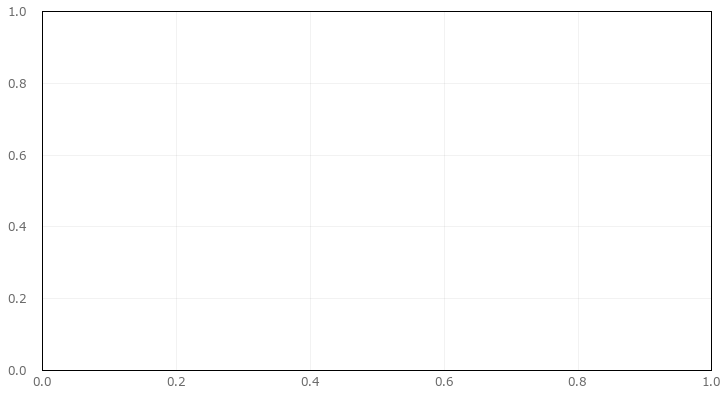

In [59]:
analyze_object.plot_line('val_accuracy')

Matplotlib Runtime Error. Plots will not work.


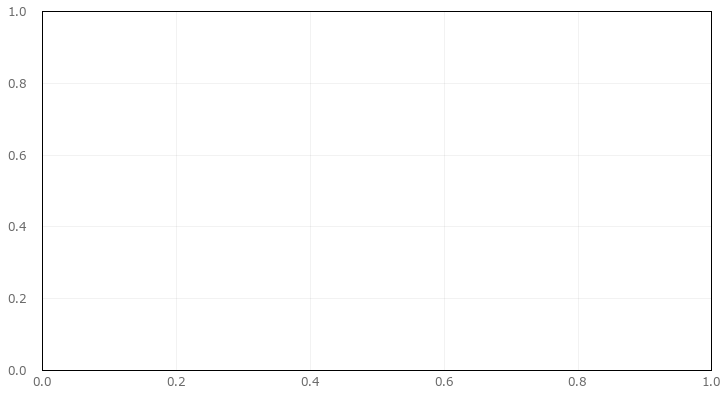

In [60]:
analyze_object.plot_line('accuracy')

#### Talos Grid Search  for LSTM-CNN Model

In [61]:
def toxic_classifier(x_train,y_train,x_val,y_val,params):

  inp=Input(shape=(maxpadlen, ),dtype='int32')

  embedding_layer = Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings')
  embedded_sequences = embedding_layer(inp)

  x = LSTM(params['output_count_lstm'], return_sequences=True,name='lstm_layer')(embedded_sequences)

  x = Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], padding='same', activation='relu', kernel_initializer='he_uniform')(x)

  x = MaxPooling1D(params['pool_size'])(x)
  
  x = GlobalMaxPool1D()(x)
  
  x = BatchNormalization()(x)
  
  x = Dense(params['output_1_count_dense'], activation=params['activation'], kernel_initializer='he_uniform')(x)
  
  x = Dropout(params['dropout'])(x)

  x = Dense(params['output_2_count_dense'], activation=params['activation'], kernel_initializer='he_uniform')(x)
  
  x = Dropout(params['dropout'])(x)
  
  preds = Dense(6, activation=params['last_activation'], kernel_initializer='glorot_uniform')(x)

  model = Model(inputs=inp, outputs=preds)

  model.compile(loss=params['loss'], optimizer=params['optimizer'], metrics=['accuracy'])

  model_info=model.fit(x_train,y_train, epochs=params['epochs'], batch_size=params['batch_size'],  validation_data=(x_val, y_val))

  return model_info, model

In [62]:
p={
    'output_count_lstm': [50,60],
    'output_1_count_dense': [40,50],
    'output_2_count_dense': [30,40],
    'filters' : [64],
    'kernel_size' : [3],
    'batch_size': [32],
    'pool_size': [3],
    'epochs':[2],
    'optimizer':['adam'],
    'activation':['relu'],
    'last_activation': ['sigmoid'],
    'dropout':[0.1,0.2],
    'loss': ['binary_crossentropy']   
}

In [63]:
scan_results = talos.Scan(x=x_train,
               y=y_train,
               x_val=x_val,
               y_val=y_val,
               model=toxic_classifier,
               params=p,
               experiment_name='tcc',
               print_params=True)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 507s 127ms/step - loss: 0.0671 - accuracy: 0.9477 - val_loss: 0.0546 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 482s 121ms/step - loss: 0.0528 - accuracy: 0.9909 - val_loss: 0.0526 - val_accuracy: 0.9892


  6%|█████                                                                           | 1/16 [16:37<4:09:26, 997.74s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 495s 124ms/step - loss: 0.0706 - accuracy: 0.9225 - val_loss: 0.0577 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 470s 118ms/step - loss: 0.0544 - accuracy: 0.9927 - val_loss: 0.0506 - val_accuracy: 0.9939


 12%|██████████                                                                      | 2/16 [32:47<3:48:59, 981.40s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 513s 128ms/step - loss: 0.0662 - accuracy: 0.9288 - val_loss: 0.0522 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 498s 125ms/step - loss: 0.0522 - accuracy: 0.9874 - val_loss: 0.0494 - val_accuracy: 0.9934


 19%|███████████████                                                                 | 3/16 [49:44<3:36:09, 997.68s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 504s 126ms/step - loss: 0.0702 - accuracy: 0.9099 - val_loss: 0.0526 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 504s 126ms/step - loss: 0.0546 - accuracy: 0.9861 - val_loss: 0.0527 - val_accuracy: 0.9939


 25%|███████████████████▎                                                         | 4/16 [1:06:37<3:20:43, 1003.60s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 528s 132ms/step - loss: 0.0657 - accuracy: 0.9032 - val_loss: 0.0525 - val_accuracy: 0.9924
Epoch 2/2
3990/3990 [==============================] - 516s 129ms/step - loss: 0.0522 - accuracy: 0.9829 - val_loss: 0.0502 - val_accuracy: 0.9924


 31%|████████████████████████                                                     | 5/16 [1:24:04<3:06:51, 1019.22s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 489s 122ms/step - loss: 0.0743 - accuracy: 0.8942 - val_loss: 0.0601 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 496s 124ms/step - loss: 0.0547 - accuracy: 0.9768 - val_loss: 0.0508 - val_accuracy: 0.9939


 38%|████████████████████████████▉                                                | 6/16 [1:40:35<2:48:16, 1009.66s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 517s 129ms/step - loss: 0.0632 - accuracy: 0.9177 - val_loss: 0.0541 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 513s 129ms/step - loss: 0.0521 - accuracy: 0.9774 - val_loss: 0.0524 - val_accuracy: 0.9934


 44%|█████████████████████████████████▋                                           | 7/16 [1:57:52<2:32:48, 1018.67s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 546s 136ms/step - loss: 0.0676 - accuracy: 0.9198 - val_loss: 0.0524 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 553s 138ms/step - loss: 0.0540 - accuracy: 0.9872 - val_loss: 0.0503 - val_accuracy: 0.9939


 50%|██████████████████████████████████████▌                                      | 8/16 [2:16:17<2:19:28, 1046.05s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 541s 135ms/step - loss: 0.0680 - accuracy: 0.9340 - val_loss: 0.0534 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 551s 138ms/step - loss: 0.0532 - accuracy: 0.9752 - val_loss: 0.0508 - val_accuracy: 0.9939


 56%|███████████████████████████████████████████▎                                 | 9/16 [2:34:40<2:04:06, 1063.81s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 631s 157ms/step - loss: 0.0691 - accuracy: 0.9119 - val_loss: 0.0537 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 578s 145ms/step - loss: 0.0549 - accuracy: 0.9760 - val_loss: 0.0545 - val_accuracy: 0.9939


 62%|███████████████████████████████████████████████▌                            | 10/16 [2:55:01<1:51:14, 1112.36s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 581s 145ms/step - loss: 0.0664 - accuracy: 0.9140 - val_loss: 0.0601 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 565s 142ms/step - loss: 0.0528 - accuracy: 0.9713 - val_loss: 0.0503 - val_accuracy: 0.9939


 69%|████████████████████████████████████████████████████▎                       | 11/16 [3:14:14<1:33:44, 1124.91s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 550s 137ms/step - loss: 0.0718 - accuracy: 0.8801 - val_loss: 0.0532 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 559s 140ms/step - loss: 0.0547 - accuracy: 0.9772 - val_loss: 0.0511 - val_accuracy: 0.9939


 75%|█████████████████████████████████████████████████████████                   | 12/16 [3:32:49<1:14:46, 1121.71s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 572s 143ms/step - loss: 0.0640 - accuracy: 0.9520 - val_loss: 0.0669 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 568s 142ms/step - loss: 0.0525 - accuracy: 0.9895 - val_loss: 0.0493 - val_accuracy: 0.9939


 81%|███████████████████████████████████████████████████████████████▍              | 13/16 [3:51:53<56:25, 1128.65s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 602s 150ms/step - loss: 0.0700 - accuracy: 0.8944 - val_loss: 0.0593 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 618s 155ms/step - loss: 0.0548 - accuracy: 0.9880 - val_loss: 0.0499 - val_accuracy: 0.9937


 88%|████████████████████████████████████████████████████████████████████▎         | 14/16 [4:12:31<38:43, 1161.75s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 651s 162ms/step - loss: 0.0664 - accuracy: 0.8673 - val_loss: 0.0567 - val_accuracy: 0.9936
Epoch 2/2
3990/3990 [==============================] - 617s 155ms/step - loss: 0.0519 - accuracy: 0.9562 - val_loss: 0.0515 - val_accuracy: 0.9927


 94%|█████████████████████████████████████████████████████████████████████████▏    | 15/16 [4:33:52<19:57, 1197.66s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
3990/3990 [==============================] - 632s 158ms/step - loss: 0.0682 - accuracy: 0.8842 - val_loss: 0.0583 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 632s 158ms/step - loss: 0.0540 - accuracy: 0.9850 - val_loss: 0.0511 - val_accuracy: 0.9938


100%|██████████████████████████████████████████████████████████████████████████████| 16/16 [4:55:13<00:00, 1107.07s/it]


In [64]:
model_id = scan_results.data['val_accuracy'].astype('float').argmax()
model_id

1

In [65]:
scan_results.data[8:9]

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,output_count_lstm,output_1_count_dense,...,filters,kernel_size,batch_size,pool_size,epochs,optimizer,activation,last_activation,dropout,loss
8,05/19/24-191740,05/19/24-193555,1095.147341,2,0.053245,0.97516,0.050784,0.99389,60,40,...,64,3,32,3,2,adam,relu,sigmoid,0.1,binary_crossentropy


In [66]:
analyze_object = talos.Analyze(scan_results)

In [67]:
analyze_object.best_params('val_accuracy', ['accuracy', 'loss', 'val_loss'])

array([['05/19/24-171800', 64, 'sigmoid', 3, 40, 'adam', 3, 2,
        '05/19/24-173408', 2, 30, 0.2, 32, 968.3543014526367, 'relu', 50,
        0],
       ['05/19/24-175107', 64, 'sigmoid', 3, 40, 'adam', 3, 2,
        '05/19/24-180758', 2, 40, 0.2, 32, 1010.4388053417206, 'relu',
        50, 1],
       ['05/19/24-182527', 64, 'sigmoid', 3, 50, 'adam', 3, 2,
        '05/19/24-184155', 2, 30, 0.2, 32, 987.8820707798004, 'relu', 50,
        2],
       ['05/19/24-193603', 64, 'sigmoid', 3, 40, 'adam', 3, 2,
        '05/19/24-195616', 2, 30, 0.2, 32, 1213.4426565170288, 'relu',
        60, 3],
       ['05/19/24-195624', 64, 'sigmoid', 3, 40, 'adam', 3, 2,
        '05/19/24-201533', 2, 40, 0.1, 32, 1149.5333361625671, 'relu',
        60, 4],
       ['05/19/24-201537', 64, 'sigmoid', 3, 40, 'adam', 3, 2,
        '05/19/24-203411', 2, 40, 0.2, 32, 1113.514033317566, 'relu', 60,
        5],
       ['05/19/24-185915', 64, 'sigmoid', 3, 50, 'adam', 3, 2,
        '05/19/24-191737', 2, 40, 0.2, 3

Matplotlib Runtime Error. Plots will not work.


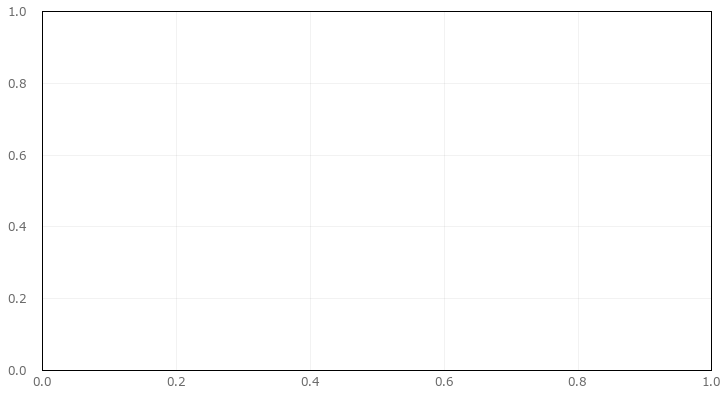

In [68]:
analyze_object.plot_line('val_accuracy')

Matplotlib Runtime Error. Plots will not work.


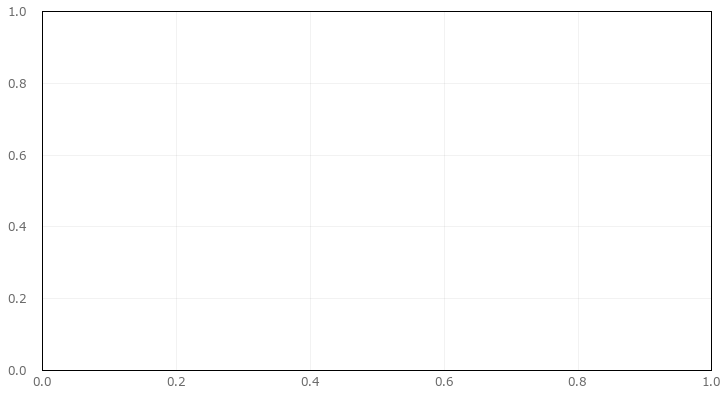

In [69]:
analyze_object.plot_line('accuracy')

#### Training Model with Best Parameters

LSTM

In [70]:
inp=Input(shape=(maxpadlen, ),dtype='int32')

In [71]:
embedding_layer = Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(inp)

In [72]:
x = LSTM(40, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(30, activation="relu", kernel_initializer='he_uniform')(x)
x = Dropout(0.1)(x)
preds = Dense(6, activation="sigmoid", kernel_initializer='glorot_uniform')(x)

In [73]:
model_1 = Model(inputs=inp, outputs=preds)
model_1.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [74]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embeddings (Embedding)      (None, 200, 300)          44675400  
                                                                 
 lstm_layer (LSTM)           (None, 200, 40)           54560     
                                                                 
 global_max_pooling1d (Glob  (None, 40)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 30)                1230      
                                                             

In [75]:
model_info_1=model_1.fit(x_train,y_train, epochs=2, batch_size=32,  validation_data=(x_val, y_val))

Epoch 1/2
3990/3990 [==============================] - 516s 128ms/step - loss: 0.0634 - accuracy: 0.9439 - val_loss: 0.0506 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 493s 124ms/step - loss: 0.0496 - accuracy: 0.9911 - val_loss: 0.0476 - val_accuracy: 0.9939


LSTM-CNN

In [76]:
inp=Input(shape=(maxpadlen, ),dtype='int32')

In [77]:
embedding_layer = Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(inp)

In [78]:
x = LSTM(50, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = MaxPooling1D(3)(x)
x = GlobalMaxPool1D()(x)
x = BatchNormalization()(x)
x = Dense(40, activation="relu", kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)
x = Dense(30, activation="relu", kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)
preds = Dense(6, activation="sigmoid", kernel_initializer='glorot_uniform')(x)

In [79]:
model_2 = Model(inputs=inp, outputs=preds)
model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [80]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embeddings (Embedding)      (None, 200, 300)          44675400  
                                                                 
 lstm_layer (LSTM)           (None, 200, 50)           70200     
                                                                 
 conv1d (Conv1D)             (None, 200, 64)           9664      
                                                                 
 max_pooling1d (MaxPooling1  (None, 66, 64)            0         
 D)                                                              
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                         

In [81]:
model_info_2=model_2.fit(x_train,y_train, epochs=2, batch_size=32,  validation_data=(x_val, y_val))

Epoch 1/2
3990/3990 [==============================] - 625s 156ms/step - loss: 0.0719 - accuracy: 0.8887 - val_loss: 0.0520 - val_accuracy: 0.9939
Epoch 2/2
3990/3990 [==============================] - 569s 143ms/step - loss: 0.0551 - accuracy: 0.9782 - val_loss: 0.0531 - val_accuracy: 0.9939


## Plotting Graphs

### LSTM

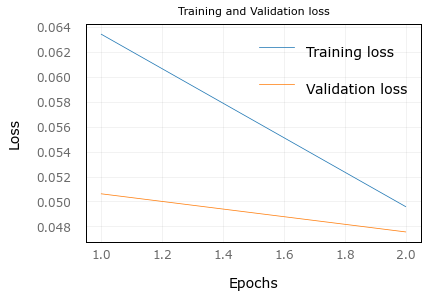

In [82]:
loss = model_info_1.history['loss']
val_loss = model_info_1.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

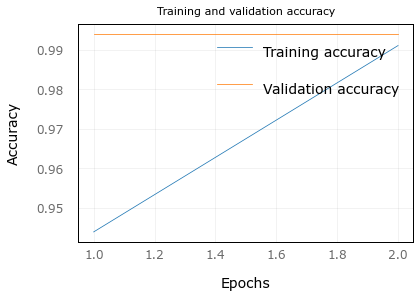

In [83]:
accuracy = model_info_1.history['accuracy']
val_accuracy = model_info_1.history['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

### LSTM-CNN

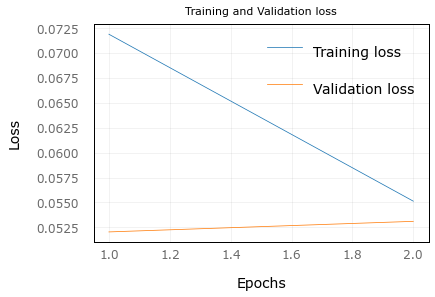

In [84]:
loss = model_info_2.history['loss']
val_loss = model_info_2.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

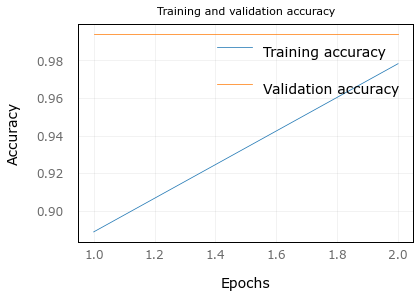

In [85]:
accuracy = model_info_2.history['accuracy']
val_accuracy = model_info_2.history['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

# Saving the Model

In [91]:
model_1.save(filepath="model1")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [92]:
model_2.save(filepath="model2")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


# Loading Saved Model

In [93]:
loaded_model_1 = keras.models.load_model(filepath="model1")

In [94]:
loaded_model_2 = keras.models.load_model(filepath="model2")

# Generating the Output

### LSTM

In [95]:
test_values_1 = loaded_model_1.predict([X_te], batch_size=1, verbose=1)

153164/153164 [==============================] - 1889s 12ms/step


In [97]:
sample_submission = pd.read_csv('sample_submission.csv')
test_values_1=pd.DataFrame(test_values_1,columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
submission = pd.DataFrame(sample_submission["id"])
combined_submission=pd.concat([submission,test_values_1],axis=1)
combined_submission.to_csv('sample_submission1.csv', index=False)

### LSTM-CNN

In [98]:
test_values_2 = loaded_model_2.predict([X_te], batch_size=1, verbose=1)

153164/153164 [==============================] - 1930s 13ms/step


In [99]:
sample_submission = pd.read_csv('sample_submission.csv')
test_values_2=pd.DataFrame(test_values_2,columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
submission = pd.DataFrame(sample_submission["id"])
combined_submission=pd.concat([submission,test_values_2],axis=1)
combined_submission.to_csv('sample_submission2.csv', index=False)

# Testing the Created Model

In [105]:
def toxicity_level(string):
    new_string = [string]
    new_string = tokenizer.texts_to_sequences(new_string)
    new_string = pad_sequences(new_string, maxlen=maxpadlen, padding='post')
    
    prediction = model_2.predict(new_string) #(Change to model_1 or model_2 depending on the preference of model type|| Model 1: LSTM, Model 2:LSTM-CNN)
    
    print("Toxicity levels for '{}':".format(string))
    print('Toxic:         {:.0%}'.format(prediction[0][0]))
    print('Severe Toxic:  {:.0%}'.format(prediction[0][1]))
    print('Obscene:       {:.0%}'.format(prediction[0][2]))
    print('Threat:        {:.0%}'.format(prediction[0][3]))
    print('Insult:        {:.0%}'.format(prediction[0][4]))
    print('Identity Hate: {:.0%}'.format(prediction[0][5]))
    print()
    
    return

In [106]:
toxicity_level('go jump off a bridge jerk')

1/1 [==============================] - 1s 1s/step
Toxicity levels for 'go jump off a bridge jerk':
Toxic:         81%
Severe Toxic:  2%
Obscene:       45%
Threat:        0%
Insult:        42%
Identity Hate: 1%



In [107]:
toxicity_level('i will kill you')

1/1 [==============================] - 0s 42ms/step
Toxicity levels for 'i will kill you':
Toxic:         22%
Severe Toxic:  0%
Obscene:       6%
Threat:        0%
Insult:        7%
Identity Hate: 1%



In [108]:
toxicity_level('have a nice day')

1/1 [==============================] - 0s 43ms/step
Toxicity levels for 'have a nice day':
Toxic:         1%
Severe Toxic:  0%
Obscene:       0%
Threat:        0%
Insult:        0%
Identity Hate: 0%



In [109]:
toxicity_level('fuck ofF!!')

1/1 [==============================] - 0s 31ms/step
Toxicity levels for 'fuck ofF!!':
Toxic:         100%
Severe Toxic:  34%
Obscene:       98%
Threat:        2%
Insult:        85%
Identity Hate: 8%



In [110]:
toxicity_level('Hello, How are you?')

1/1 [==============================] - 0s 29ms/step
Toxicity levels for 'Hello, How are you?':
Toxic:         1%
Severe Toxic:  0%
Obscene:       0%
Threat:        0%
Insult:        0%
Identity Hate: 0%



In [111]:
toxicity_level('get the fuck away from me @sshole!!')

1/1 [==============================] - 0s 29ms/step
Toxicity levels for 'get the fuck away from me @sshole!!':
Toxic:         99%
Severe Toxic:  14%
Obscene:       94%
Threat:        1%
Insult:        78%
Identity Hate: 3%



In [117]:
toxicity_level('it took me a fucking lot of time love')

1/1 [==============================] - 0s 41ms/step
Toxicity levels for 'it took me a fucking lot of time love':
Toxic:         3%
Severe Toxic:  0%
Obscene:       0%
Threat:        0%
Insult:        0%
Identity Hate: 0%

